In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
acc = []
model = []
#Load dataset
crops = pd.read_csv('input/Crop_recommendation.csv')

X=crops[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # input values
Y=crops['label']  # output

test_train_ratio = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)
test_train_ratio = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)
test_train_ratio = 0.3
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)
test_train_ratio = 0.4
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)
test_train_ratio = 0.5
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, Y, test_size=test_train_ratio, shuffle=True)

In [11]:
#K-nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
def knearest(xtrain, xtest, ytrain, ytest):
    error1=[]
    error2=[]
    for k in range(1,10):
      k_nn = KNeighborsClassifier(n_neighbors=k)
      k_nn.fit(xtrain,ytrain)
      y_pred1 = k_nn.predict(xtrain)
      error1.append(np.mean(ytrain!=y_pred1, keepdims=False))
      y_pred2 = k_nn.predict(xtest)
      error2.append(np.mean(ytest!=y_pred2, keepdims=False))
    plt.plot(range(1,10),error1,label='train')
    plt.plot(range(1,10),error2,label='test')
    plt.xlabel('K - Value')
    plt.ylabel('Error')
    plt.legend()

In [12]:
from sklearn.preprocessing import MinMaxScaler
def analysis(xtrain, xtest, ytrain, ytest):
    norm = MinMaxScaler().fit(xtrain)
    X_train_norm = norm.transform(xtrain)
    X_test_norm = norm.transform(xtest)

    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train_norm,ytrain)
    predicted_values = knn.predict(X_test_norm)

    x = metrics.accuracy_score(ytest, predicted_values)

    acc.append(x)                         #accuracy
    print("KNN's Accuracy is: ", x)

    print(classification_report(ytest,predicted_values))

[0.0, 0.012626262626262626, 0.010101010101010102, 0.015151515151515152, 0.013131313131313131, 0.014646464646464647, 0.013636363636363636, 0.01717171717171717, 0.013636363636363636]
KNN's Accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         5
      banana       1.00      1.00      1.00         7
   blackgram       1.00      1.00      1.00        13
    chickpea       1.00      1.00      1.00         8
     coconut       1.00      1.00      1.00        12
      coffee       1.00      1.00      1.00        14
      cotton       0.90      1.00      0.95         9
      grapes       1.00      1.00      1.00        11
        jute       0.77      1.00      0.87        10
 kidneybeans       1.00      1.00      1.00         7
      lentil       0.86      1.00      0.92         6
       maize       1.00      0.92      0.96        12
       mango       1.00      1.00      1.00        14
   mothbeans       1.00

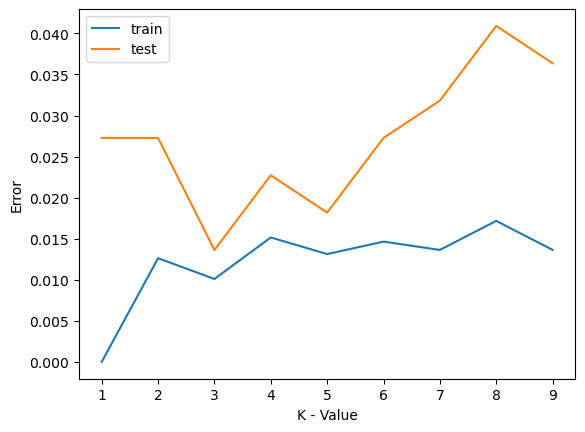

In [13]:
knearest(X_train, X_test, y_train, y_test)
analysis(X_train, X_test, y_train, y_test)

KNN's Accuracy is:  0.9840909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        15
   blackgram       0.91      1.00      0.95        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        22
      cotton       0.96      1.00      0.98        25
      grapes       1.00      1.00      1.00        20
        jute       0.84      1.00      0.91        16
 kidneybeans       1.00      1.00      1.00        23
      lentil       0.96      0.96      0.96        23
       maize       1.00      0.96      0.98        25
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      1.00      1.00        11
    mungbean       1.00      1.00      1.00        11
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.0

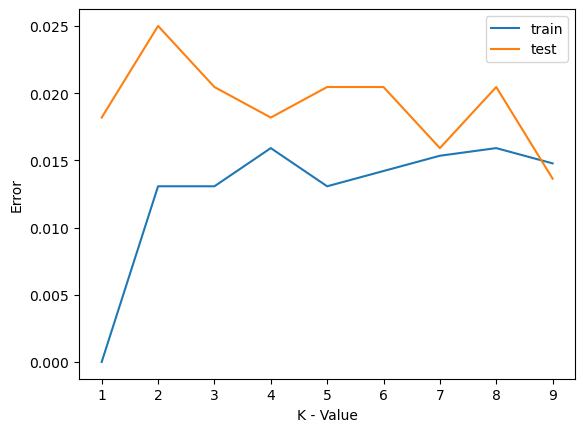

In [6]:
knearest(X_train1, X_test1, y_train1, y_test1)
analysis(X_train1, X_test1, y_train1, y_test1)

KNN's Accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        37
   blackgram       0.90      0.96      0.93        27
    chickpea       1.00      1.00      1.00        23
     coconut       0.97      1.00      0.99        33
      coffee       1.00      1.00      1.00        27
      cotton       0.96      1.00      0.98        24
      grapes       1.00      1.00      1.00        23
        jute       0.79      1.00      0.88        26
 kidneybeans       1.00      1.00      1.00        29
      lentil       0.97      0.95      0.96        37
       maize       1.00      0.96      0.98        28
       mango       1.00      1.00      1.00        30
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        38
      orange       1.00      0.93      0.9

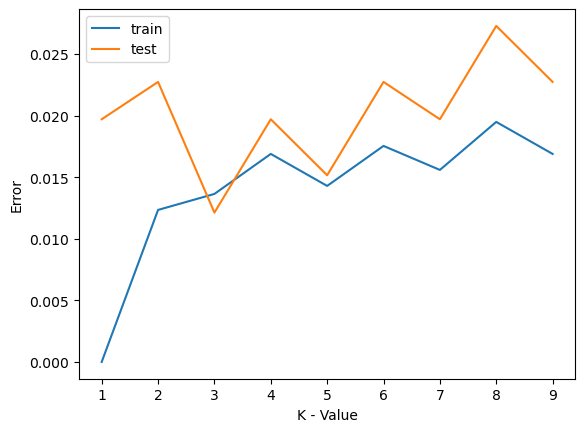

In [7]:
knearest(X_train2, X_test2, y_train2, y_test2)
analysis(X_train2, X_test2, y_train2, y_test2)

KNN's Accuracy is:  0.9659090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        44
      banana       1.00      1.00      1.00        32
   blackgram       0.93      0.97      0.95        39
    chickpea       1.00      1.00      1.00        42
     coconut       1.00      1.00      1.00        39
      coffee       0.98      1.00      0.99        45
      cotton       0.95      1.00      0.97        39
      grapes       1.00      1.00      1.00        41
        jute       0.71      0.97      0.82        40
 kidneybeans       0.94      1.00      0.97        32
      lentil       0.91      1.00      0.95        39
       maize       1.00      0.95      0.97        37
       mango       1.00      1.00      1.00        39
   mothbeans       1.00      0.93      0.97        45
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        41
      orange       1.00      0.95      0.9

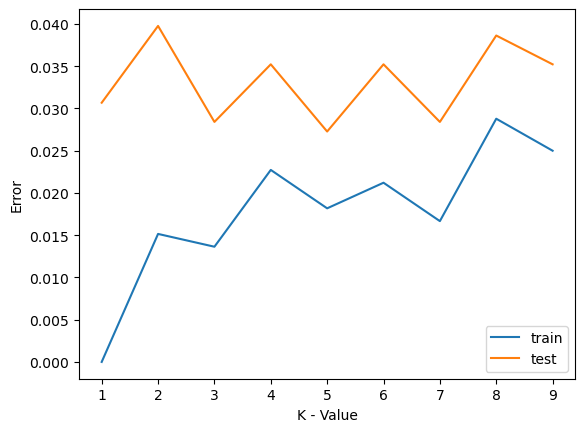

In [8]:
knearest(X_train3, X_test3, y_train3, y_test3)
analysis(X_train3, X_test3, y_train3, y_test3)

KNN's Accuracy is:  0.9645454545454546
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        45
      banana       1.00      1.00      1.00        46
   blackgram       0.84      0.98      0.91        44
    chickpea       1.00      1.00      1.00        41
     coconut       1.00      1.00      1.00        47
      coffee       0.98      1.00      0.99        50
      cotton       0.98      1.00      0.99        58
      grapes       1.00      1.00      1.00        51
        jute       0.73      0.98      0.84        50
 kidneybeans       0.98      1.00      0.99        52
      lentil       0.90      0.90      0.90        42
       maize       1.00      0.98      0.99        48
       mango       0.98      1.00      0.99        58
   mothbeans       0.94      0.92      0.93        49
    mungbean       1.00      1.00      1.00        56
   muskmelon       1.00      1.00      1.00        50
      orange       1.00      0.96      0.9

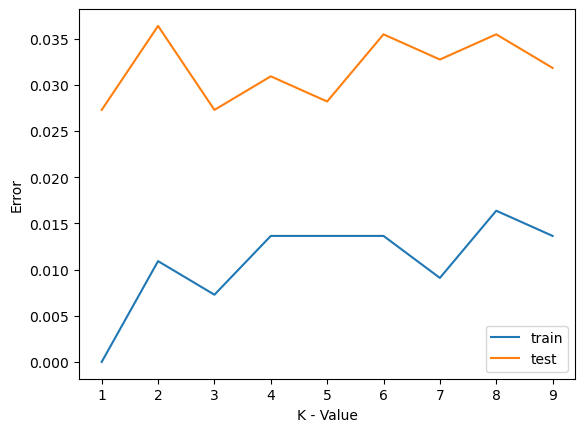

In [9]:
knearest(X_train4, X_test4, y_train4, y_test4)
analysis(X_train4, X_test4, y_train4, y_test4)

In [10]:
print(acc)

[0.9772727272727273, 0.9840909090909091, 0.9772727272727273, 0.9659090909090909, 0.9645454545454546]
